In [5]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("C:\\Users\\Admin\\Desktop\\DP\\train (2).csv")

In [10]:
data.head(10)


id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...

In [11]:
test_data = pd.read_csv("C:\\Users\\Admin\\Desktop\\DP\\test (2).csv")


In [12]:
import re
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df
test_clean = clean_text(test_data,"tweet")
train_clean = clean_text(data, "tweet")

In [13]:
train_clean.head()


id  label                                              tweet
0   1      0    when a father is dysfunctional and is so sel...
1   2      0    thanks for lyft credit i cant use cause they...
2   3      0                                bihday your majesty
3   4      0  model   i love u take with u all the time in u...
4   5      0               factsguide society now    motivation

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

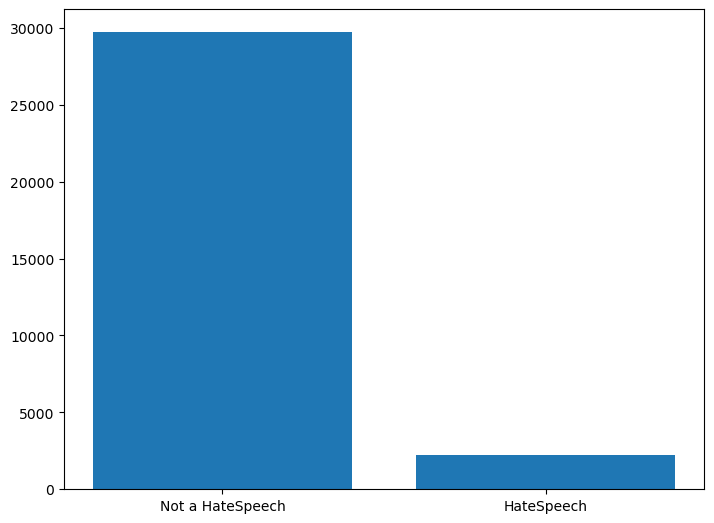

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_clean[train_clean.label==0]), len(train_clean[train_clean.label==1])]
ax.bar(langs,data)
plt.show()

In [16]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority,
                                   replace=True,
                                   n_samples=len(train_majority),
                                   random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

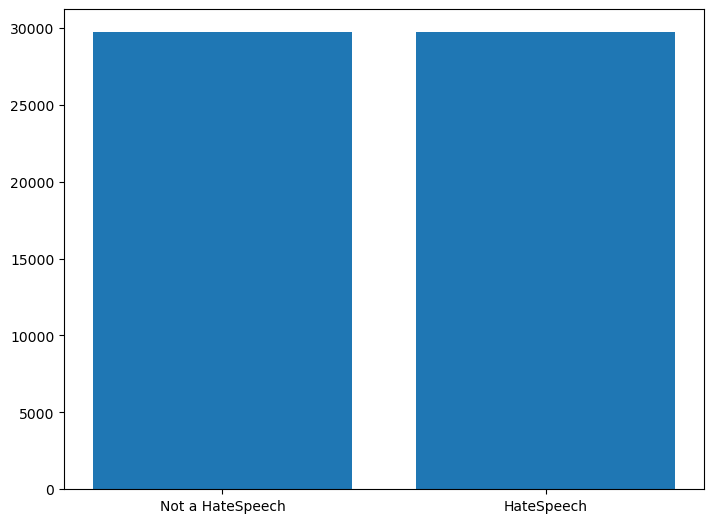

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_upsampled[train_upsampled.label==0]), len(train_upsampled[train_upsampled.label==1])]
ax.bar(langs,data)
plt.show()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('nb', SGDClassifier()),
])


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],train_upsampled['label'], random_state=8)

In [21]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import f1_score
print(f1_score(y_test, y_predict))

0.9632931305715783


In [22]:
text = 'kill you buddy'
predict = model.predict([text])

In [23]:
predict


array([0], dtype=int64)

In [24]:
import pickle


In [25]:
saved_model = pickle.dumps(model)

In [26]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model,file)

In [27]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)